In [2]:
# for the last submission

import numpy as np
import pandas as pd

# first we load the misc attribute data and to do the corresponding data manipulation
# 1. check if there is any null data and replace with the mean value
# 2. convert the categorical data using the one-hot method through the get_dummies
# which is better for decision tree and perceptron algorithm training
train_misc_data = pd.read_csv("project_data/data/misc-attributes/misc-attributes-train.csv")
test_misc_data = pd.read_csv("project_data/data/misc-attributes/misc-attributes-test.csv")
eval_misc_data = pd.read_csv("project_data/data/misc-attributes/misc-attributes-eval.csv")
print(train_misc_data.head())
print(test_misc_data.head())
print(eval_misc_data.head())
print(train_misc_data.shape)
print(test_misc_data.shape)
print(eval_misc_data.shape)

  defendant_age defendant_gender  num_victims victim_genders offence_category  \
0            62           female            1           male            theft   
1            17             male            1           male            theft   
2     not known             male            1           male            theft   
3     not known             male            1           male            theft   
4            52             male            1         female            theft   

  offence_subcategory  
0      theftFromPlace  
1       pocketpicking  
2       pocketpicking  
3       simpleLarceny  
4       pocketpicking  
  defendant_age defendant_gender  num_victims victim_genders offence_category  \
0            54             male            1           male        deception   
1     not known             male            1         female            theft   
2            18             male            1           male            theft   
3            23             male            1

In [3]:
# here we data cleaning all these three datasets
print(eval_misc_data['offence_subcategory'].unique())
print(train_misc_data['offence_subcategory'].unique())

['grandLarceny' 'coiningOffences' 'infanticide' 'burglary'
 'theftFromPlace' 'simpleLarceny' 'rape' 'murder' 'wounding' 'receiving'
 'other' 'housebreaking' 'stealingFromMaster' 'pettyLarceny' 'robbery'
 'highwayRobbery' 'perjury' 'animalTheft' 'assault' 'mail' 'sodomy'
 'fraud' 'pocketpicking' 'returnFromTransportation' 'embezzlement'
 'bigamy' 'shoplifting' 'threateningBehaviour' 'indecentAssault'
 'concealingABirth' 'pervertingJustice' 'manslaughter' 'arson'
 'assaultWithIntent' 'libel' 'keepingABrothel' 'forgery' 'extortion'
 'kidnapping' 'gameLawOffence' 'religiousOffences' 'bankrupcy'
 'illegalAbortion' 'conspiracy' 'vagabond' 'taxOffences' 'seditiousLibel'
 'assaultWithSodomiticalIntent' 'riot' 'pettyTreason' 'seducingAllegiance'
 'seditiousWords' 'treason']
['theftFromPlace' 'pocketpicking' 'simpleLarceny' 'bigamy' 'housebreaking'
 'coiningOffences' 'grandLarceny' 'fraud' 'forgery' 'manslaughter'
 'stealingFromMaster' 'wounding' 'riot' 'rape' 'murder' 'embezzlement'
 'highwayRo

In [4]:
# replace the not known, four years as the most common age
clean_nums = {"defendant_age" : {"fifteen years old" : 15, "eighteen" : 18, "thirty six" : 36, "fourteen" : 14, "twelve years of age" : 12,
                                 "ten" : 10, "Fifteen" : 15, "sixteen" : 16, "17 years" : 17, "twelve" : 12, "13 years":13,
                                 "eleven" : 11, "sixty-eight years":68, "sixty-three years of age":63, "seventeen years" : 17,
                                 "fifty" : 50, " (24)" : 24, " (26)" : 26, "thirteen": 13, "about 11 years age":11,
                                 "fifteen":15, "Thirteen":13, "twenty":20, "Fourscore years":18, "not known":18}}
train_misc_data.replace(clean_nums, inplace=True)
print(train_misc_data['defendant_age'].value_counts())
print(train_misc_data['defendant_age'].unique())
train_misc_data['defendant_age'].astype("int64")

18    9588
18     438
20     433
19     424
22     392
      ... 
68       1
77       1
85       1
89       1
10       1
Name: defendant_age, Length: 89, dtype: int64
['62' '17' 18 '52' '40' '30' '23' '60' '61' '49' '53' '34' '21' '28' '24'
 '22' '33' '27' '19' '37' '47' '44' '26' '59' '38' '54' '18' '51' '20' 15
 '25' '46' '13' '29' '39' '32' 14 '35' '16' '58' '31' '36' 12 '45' '43'
 '55' '57' '14' '77' '41' '15' '79' 10 '66' '42' '48' '69' '75' '50' '12'
 '65' '72' '11' '63' '64' '67' '10' '70' '85' '56' '68' 16 17 '9' '73' '8'
 13 11 68 63 '74' 36 50 24 26 '71' 20 '76' '89']


0        62
1        17
2        18
3        18
4        52
         ..
17495    18
17496    18
17497    18
17498    18
17499    18
Name: defendant_age, Length: 17500, dtype: int64

In [5]:
print(test_misc_data['defendant_age'].value_counts())
clean_nums_test = {"defendant_age" : {"thirteen":13, "seventeen":17, "Ten":10, "sixteen":16, "not known":23}}
test_misc_data.replace(clean_nums_test, inplace=True)
test_misc_data['defendant_age'].astype("int64")

not known    1217
23             58
22             55
20             51
19             46
             ... 
thirteen        1
seventeen       1
63              1
58              1
69              1
Name: defendant_age, Length: 65, dtype: int64


0       54
1       23
2       18
3       23
4       23
        ..
2245    28
2246    28
2247    23
2248    37
2249    23
Name: defendant_age, Length: 2250, dtype: int64

In [6]:
print(eval_misc_data['defendant_age'].unique())
print(eval_misc_data['defendant_age'].value_counts())
clean_nums_eval = {"defendant_age" : {"thirteen years of age":13, "m":18, "about 14":14, "83d Year of his Age":83,
                                      "not known":18, "nine":9, "fifteen": 15, "eleven years old and six months":11,
                                      "14 years of age":14, "twelve":12, "ten":10, "seventeen":17, "11 or 12":12}}
eval_misc_data.replace(clean_nums_eval, inplace=True)
eval_misc_data['defendant_age'].astype("int64")

['not known' '26' '78' '31' '24' '41' '28' '52' '21' '33' '19' '18' '25'
 '16' '48' '15' '34' '45' '38' '12' '17' '22' '23' '35' '32' '14' '50'
 '20' '40' '13' '29' '39' '11' '37' '30' '27' '58' '43' '59' '75' '47'
 '62' '51' '36' '63' '42' '54' 'm' '46' '60' '53' '44' '64' '49'
 'thirteen years of age' '57' '69' 'about 14' '56' '83d Year of his Age'
 '76' '65' '55' '67' 'nine' 'fifteen' 'eleven years old and six months'
 '61' '66' '10' '68' '88' '71' '14 years of age' 'twelve' 'seventeen' '70'
 'ten' '11 or 12' '72']
not known    2856
18            118
21            115
22            113
20            113
             ... 
71              1
11 or 12        1
fifteen         1
69              1
twelve          1
Name: defendant_age, Length: 80, dtype: int64


0       18
1       26
2       18
3       18
4       18
        ..
5245    18
5246    18
5247    18
5248    26
5249    16
Name: defendant_age, Length: 5250, dtype: int64

In [7]:
train_misc_data[train_misc_data.isnull().any(axis=1)]

,defendant_age,defendant_gender,num_victims,victim_genders,offence_category,offence_subcategory
5,40,male,0,NaN,sexual,bigamy
8,30,male,0,NaN,royalOffences,coiningOffences
12,61,male,0,NaN,theft,theftFromPlace
15,49,male,0,NaN,deception,forgery
16,53,female,0,NaN,deception,forgery
...,...,...,...,...,...,...
17433,18,male,0,NaN,miscellaneous,other
17441,18,female,0,NaN,theft,housebreaking
17474,18,male,0,NaN,theft,grandLarceny
17496,18,male,0,NaN,theft,animalTheft


In [8]:
train_misc_data['victim_genders'].value_counts()
# replace the null as male
train_misc_data['victim_genders'].fillna('male', inplace=True)

In [9]:
test_misc_data[test_misc_data.isnull().any(axis=1)]

,defendant_age,defendant_gender,num_victims,victim_genders,offence_category,offence_subcategory
6,22,female,0,NaN,miscellaneous,concealingABirth
8,23,male,0,NaN,theft,grandLarceny
11,23,female,0,NaN,royalOffences,coiningOffences
26,23,male,0,NaN,deception,fraud
30,38,male,0,NaN,royalOffences,coiningOffences
...,...,...,...,...,...,...
2226,23,male,0,NaN,deception,perjury
2241,23,male,0,NaN,royalOffences,coiningOffences
2245,28,male,0,NaN,deception,forgery
2248,37,male,0,NaN,deception,forgery


In [10]:
test_misc_data['victim_genders'].value_counts()
test_misc_data['victim_genders'].fillna('male', inplace=True)

In [11]:
eval_misc_data[eval_misc_data.isnull().any(axis=1)]

,defendant_age,defendant_gender,num_victims,victim_genders,offence_category,offence_subcategory
1,26,male,0,NaN,royalOffences,coiningOffences
3,18,female,0,NaN,kill,infanticide
32,18,male,0,NaN,deception,perjury
43,18,male,0,NaN,deception,perjury
56,26,male,0,NaN,royalOffences,coiningOffences
...,...,...,...,...,...,...
5231,23,male,0,NaN,deception,fraud
5237,18,male,0,NaN,deception,perjury
5240,31,male,0,NaN,royalOffences,coiningOffences
5241,18,male,0,NaN,royalOffences,coiningOffences


In [12]:
eval_misc_data['victim_genders'].value_counts()
eval_misc_data['victim_genders'].fillna('male', inplace=True)

In [13]:
print(train_misc_data['victim_genders'].unique())
print(test_misc_data['victim_genders'].unique())
print(eval_misc_data['victim_genders'].unique())

['male' 'female' 'female;female' 'male;male' 'male;male;male'
 'male;male;male;male' 'indeterminate' 'male;female'
 'male;male;male;male;male' 'male;male;male;male;male;male' 'female;male'
 'male;male;male;male;male;male;male;male' 'male;female;female'
 'male;indeterminate' 'female;female;female;male' 'female;male;male'
 'male;female;male' 'male;male;female' 'female;female;male'
 'indeterminate;male;male' 'indeterminate;male' 'male;male;male;female'
 'female;female;female' 'female;female;female;female'
 'female;female;female;female;female' 'male;male;male;male;male;male;male'
 'female;male;male;female;male' 'male;male;indeterminate'
 'indeterminate;indeterminate' 'female;male;female'
 'male;male;male;male;male;male;male;indeterminate;indeterminate'
 'male;male;female;female;female'
 'indeterminate;male;male;male;male;male;male;male;indeterminate'
 'female;indeterminate;male;male'
 'male;male;male;male;male;indeterminate;male' 'female;male;female;male'
 'male;male;male;male;male;male;ma

In [14]:
data_sets = [train_misc_data, test_misc_data, eval_misc_data]
def encoding(data_sets, col_name):
    for data in data_sets:
        data[col_name] = data[col_name].astype("category")
        data[col_name + "_cat"] = data[col_name].cat.codes


In [15]:
encoding(data_sets, "offence_category")

In [16]:
gender = dict(zip(train_misc_data['defendant_gender'].unique(), range(len(train_misc_data['defendant_gender'].unique()))))
for data in data_sets:
    data["defendant_gender"] = data["defendant_gender"].map(gender)

In [17]:
subcategory = dict(zip(train_misc_data['offence_subcategory'].unique(), range(len(train_misc_data['offence_subcategory'].unique()))))
print(subcategory)
for data in data_sets:
    data["offence_subcategory"] = data["offence_subcategory"].map(subcategory)

{'theftFromPlace': 0, 'pocketpicking': 1, 'simpleLarceny': 2, 'bigamy': 3, 'housebreaking': 4, 'coiningOffences': 5, 'grandLarceny': 6, 'fraud': 7, 'forgery': 8, 'manslaughter': 9, 'stealingFromMaster': 10, 'wounding': 11, 'riot': 12, 'rape': 13, 'murder': 14, 'embezzlement': 15, 'highwayRobbery': 16, 'libel': 17, 'other': 18, 'infanticide': 19, 'burglary': 20, 'shoplifting': 21, 'pettyLarceny': 22, 'animalTheft': 23, 'receiving': 24, 'assaultWithIntent': 25, 'seditiousLibel': 26, 'arson': 27, 'pettyTreason': 28, 'mail': 29, 'perjury': 30, 'returnFromTransportation': 31, 'sodomy': 32, 'concealingABirth': 33, 'indecentAssault': 34, 'robbery': 35, 'extortion': 36, 'assault': 37, 'assaultWithSodomiticalIntent': 38, 'pervertingJustice': 39, 'kidnapping': 40, 'seditiousWords': 41, 'gameLawOffence': 42, 'bankrupcy': 43, 'illegalAbortion': 44, 'keepingABrothel': 45, 'piracy': 46, 'threateningBehaviour': 47, 'taxOffences': 48, 'conspiracy': 49, 'seducingAllegiance': 50, 'treason': 51, 'religio

In [18]:
for data in data_sets:
    data.drop("offence_category", inplace=True, axis=1)

In [19]:
def encoding_victim(data):
    mask1 = data['victim_genders'] == 'male' # 1
    mask2 = data['victim_genders'] == 'female'
    mask3 = (~mask1) & (~mask2)
    data['victim_genders'][mask1] = 1
    data['victim_genders'][mask2] = 0
    data['victim_genders'][mask3] = 2

In [20]:
for data in data_sets:
    encoding_victim(data)

<ipython-input-19-d4d91b753eea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['victim_genders'][mask1] = 1
<ipython-input-19-d4d91b753eea>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['victim_genders'][mask2] = 0
<ipython-input-19-d4d91b753eea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['victim_genders'][mask3] = 2


In [21]:
eval_misc_data['offence_subcategory'].iloc[713] = 53


/Users/yang/.conda/envs/pythonProject/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [22]:
train_misc_data = train_misc_data.astype(int)

In [23]:
test_misc_data = test_misc_data.astype(int)
eval_misc_data = eval_misc_data.astype(int)

In [24]:
print(train_misc_data.shape)
print(test_misc_data.shape)
print(eval_misc_data.shape)

(17500, 6)
(2250, 6)
(5250, 6)


In [25]:
# we load the other data set to make a combined dataset
def load_file2(file, num_features, miscdata):
    count =0
    label = []
    feature = []
    with open(file, 'r') as myfile:
        Lines = myfile.readlines()
        for line in Lines:
            count += 1
            #print("Line{}: {}".format(count, line.strip()))
            line_str = line.strip()
            label.append(line_str.split(" ", 1)[0])
            feature_str = '{'+line_str.split(" ", 1)[1]+'}'
            feature_str = feature_str.replace(' ',',')
            feature.append(eval(feature_str))
        # Then we convert label and features into numpy and pandas dataframe
        label = np.array(label).astype('int')
        label = np.where(label == 0, -1, label)
        feature = pd.DataFrame(feature)
        df = pd.concat([feature, miscdata], axis=1, ignore_index=True)
        df[num_features + 1] = 1
        df = df.to_numpy()
    return label, df


In [26]:
# combine with the misc dataset, we should have 306 features in total for Glove
num_features = 306
train_label, train_feature = load_file2("project_data/data/glove/glove.train.libsvm", num_features, train_misc_data)

In [27]:
test_label, test_feature = load_file2("project_data/data/glove/glove.test.libsvm", num_features, test_misc_data)
_, eval_feature = load_file2("project_data/data/glove/glove.eval.anon.libsvm", num_features, eval_misc_data)
print(train_feature.shape)
print(test_feature.shape)
print(eval_feature.shape)

(17500, 307)
(2250, 307)
(5250, 307)


In [28]:
# again we use the  previous average model to see if there is any progress
# Since right now, we have a fairly large we can split the training data in to 10 groups
train_label_folds = []
train_feature_folds = []
k = 5
train_label_folds.extend(np.array_split(train_label, k))
train_feature_folds.extend(np.array_split(train_feature, k))

# check the size
print(len(train_label_folds))
print(len(train_feature_folds))
print(train_feature_folds[0])

5
5
[[-3.73215820e-01 -4.38137740e-01 -7.10158000e-01 ...  0.00000000e+00
   7.00000000e+00  1.00000000e+00]
 [-3.43679800e-01  4.54845130e-01  3.77003700e-01 ...  1.00000000e+00
   7.00000000e+00  1.00000000e+00]
 [ 1.21473484e-01  7.02724500e-01 -6.07318760e-01 ...  1.00000000e+00
   7.00000000e+00  1.00000000e+00]
 ...
 [-3.16668800e-01  2.32117120e-01 -7.03440400e-01 ...  1.00000000e+01
   7.00000000e+00  1.00000000e+00]
 [-1.01828710e-01  5.57494700e-01  4.86208720e-02 ...  2.00000000e+00
   7.00000000e+00  1.00000000e+00]
 [-2.93604060e-02 -7.77097050e-03 -1.68246100e-01 ...  3.40000000e+01
   6.00000000e+00  1.00000000e+00]]


In [29]:
# first we use the SVM to analyze the dataset
class SVM(object):

    def __init__(self):
        self.W = None # the container to store the weight vector

    # the train method
    def train(self, X, y, learning_rate, C, num_iters):
        # we still use the same
        num = X.shape[1]
        self.W = np.random.uniform(-0.01, 0.01, size=(num,))
        #self.W = np.zeros((num,))
        # history of list to store the loss at each iteration
        loss_his = []
        wrongs = []
        for it in range(num_iters):
            loss = 0
            wrong = 0
            # print("During the %d epoch!!" % (it+1))
            # shuffle the feature and label accordingly
            # use the shape[0] to shuffle these two arrays
            s = np.arange(X.shape[0]) # how many samples we have
            np.random.shuffle(s)
            shuffled_X = X[s]
            shuffled_y = y[s]
            # iterate through each sample
            for i, x in enumerate(shuffled_X):
                #print(x.shape)
                y_i = shuffled_y[i]
                if y_i*self.W @ x <= 1:
                    # add the loss
                    loss += 0.5*self.W @ self.W + C*(1-y_i*self.W @ x)
                    self.W = (1-learning_rate/(1+it))*self.W + (learning_rate/(1+it))*C*y_i*x
                else:
                    loss += 0.5*self.W @ self.W
                    self.W = (1-learning_rate/(1+it))*self.W
            # after this epoch we record the average loss
            avg_loss = loss/X.shape[0]
            loss_his.append(avg_loss)

            if it % 5 == 0:
                print('iteration %d / %d: loss: %f' % (it, num_iters, avg_loss))

        return loss_his

    # the predict method
    def predict(self, X):
        scores = X @ self.W
        mask = scores >= 0
        scores[mask] = 1
        scores[~mask] = -1
        return scores

    # get the accuracy
    def accuracy(self, y_pred, y):
        acc = np.sum(y_pred == y) / y.shape[0]
        return acc

iteration 0 / 50: loss: 67751172944.689384
iteration 5 / 50: loss: 4622089290.577004
iteration 10 / 50: loss: 2408009543.548888
iteration 15 / 50: loss: 1649809385.795894
iteration 20 / 50: loss: 1251503640.112112
iteration 25 / 50: loss: 996570851.897585
iteration 30 / 50: loss: 821358930.073643
iteration 35 / 50: loss: 721721996.943771
iteration 40 / 50: loss: 616908058.925816
iteration 45 / 50: loss: 555614489.600433
[ 2.38553906e+02  4.44899438e+02 -1.40185948e+02  1.03792677e+02
 -5.93685313e+01 -1.34336696e+02  6.69072700e+00 -5.04005636e+01
  4.55227903e+01  4.60245125e+03 -4.51231487e+02  2.14805480e+02
 -8.31028211e+01  1.79558581e+02 -4.66699241e+02 -3.66046582e+01
  1.88859442e+02  1.33944846e+03  1.77373007e+01  1.04253682e+02
  1.27784489e+02  2.39214154e+02  1.65984558e+02  9.55816869e+01
 -8.32105597e+01 -2.63027263e+02 -4.62852621e+02 -1.46847361e+02
  2.48840112e+02  7.96057712e+01  8.44661639e+01  1.47082758e+02
 -6.54746172e+01 -1.93174521e+02  2.87195939e+02  2.1618

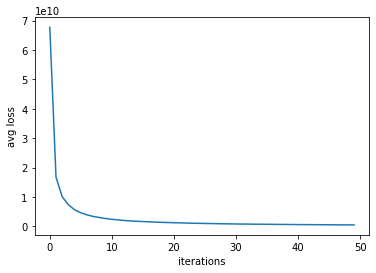

In [30]:
import matplotlib.pyplot as plt

# to determine the number of epochs we use the smallest value of learning rate and C value, and try 50 epochs
svm = SVM()
train_loss_his = svm.train(train_feature, train_label, 1, 10e3, 50)

plt.plot(train_loss_his)
plt.xlabel("iterations")
plt.ylabel("avg loss")
print(svm.W)

In [31]:
# we iterate through each depth and each fold as the validation set
learning_rates = [1, 0.1, 0.01, 10e-3, 10e-4]
Cs = [10e3, 10e2, 10, 1, 0.1, 0.01]

num_of_folds = len(train_feature_folds)
accs = np.zeros([len(learning_rates)*len(Cs), num_of_folds])

for j,lr in enumerate(learning_rates):
    for k, C in enumerate(Cs):
        for i in range(num_of_folds):
            svm = SVM()
            print("We are doing the cross_validation on lr: %f, C: %f and the %d group as validation set!" % (lr, C, i+1))
            train_concat_features = np.concatenate([train_feature_folds[l] for l in range(num_of_folds) if l != i])
            train_concat_labels = np.concatenate([train_label_folds[l] for l in range(num_of_folds) if l != i])
            svm.train(train_concat_features, train_concat_labels, lr, C, 50)
            y_pred = svm.predict(train_feature_folds[i])
            acc = svm.accuracy(y_pred, train_label_folds[i])
            accs[j*6 + k][i] = acc

print("Finished!")

print(accs)
avg_accs = np.mean(accs, axis=1)
stds = np.std(accs, axis=1)
print("The best accurary is %f with learning rate %f and C trade off at %f" % (np.max(avg_accs), learning_rates[np.argmax(avg_accs) // 6], Cs[np.argmax(avg_accs) % 6]))
for i in range(len(learning_rates)):
    for j in range(len(Cs)):
        print("The average cross-validated accuracy with learning rate %f and C %f is %f" % (learning_rates[i], Cs[j], avg_accs[i*6+j]))
        print("The average cross-validated std with learning rate %f and C %f is %f" % (learning_rates[i], Cs[j], stds[i*6+j]))

We are doing the cross_validation on lr: 1.000000, C: 10000.000000 and the 1 group as validation set!
iteration 0 / 50: loss: 67681567531.637169
iteration 5 / 50: loss: 4584660191.975943
iteration 10 / 50: loss: 2405224223.051223
iteration 15 / 50: loss: 1652368784.551579
iteration 20 / 50: loss: 1219495096.015444
iteration 25 / 50: loss: 1001837885.569565
iteration 30 / 50: loss: 827095437.008115
iteration 35 / 50: loss: 708188593.560687
iteration 40 / 50: loss: 621502268.085025
iteration 45 / 50: loss: 559471490.170586
We are doing the cross_validation on lr: 1.000000, C: 10000.000000 and the 2 group as validation set!
iteration 0 / 50: loss: 67055634615.109383
iteration 5 / 50: loss: 4708126438.504570
iteration 10 / 50: loss: 2445989132.944441
iteration 15 / 50: loss: 1646643397.137688
iteration 20 / 50: loss: 1226963645.561803
iteration 25 / 50: loss: 996571058.954608
iteration 30 / 50: loss: 852457009.045135
iteration 35 / 50: loss: 711365075.020280
iteration 40 / 50: loss: 614969

iteration 0 / 50: loss: 31.879693
iteration 5 / 50: loss: 11.347044
iteration 10 / 50: loss: 9.779249
iteration 15 / 50: loss: 9.108448
iteration 20 / 50: loss: 8.823992
iteration 25 / 50: loss: 8.605788
iteration 30 / 50: loss: 8.435590
iteration 35 / 50: loss: 8.375940
iteration 40 / 50: loss: 8.291728
iteration 45 / 50: loss: 8.248528
0.6174857142857143


Text(0.5, 1.0, 'SVM learning curve')

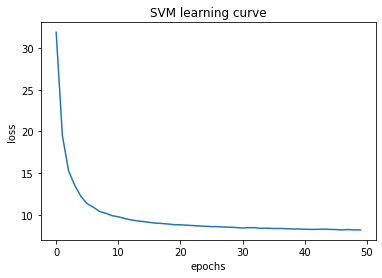

In [32]:
# from the previous cell, we know the best combination is learning rate = 0.001, C = 10
# we train with the whole model
svm = SVM()
train_loss = svm.train(train_feature, train_label, 0.001, 10, 50)
y_pred = svm.predict(train_feature)
acc = svm.accuracy(y_pred, train_label)
print(acc)
plt.plot(train_loss)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("SVM learning curve")


In [35]:
# test on the test set
y_pred = svm.predict(test_feature)
acc = svm.accuracy(y_pred, test_label)
print("the accuracy on the test set is %f." % acc)


[ 1  1  1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1  1
 -1  1  1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1 -1
  1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1
  1  1  1 -1  1 -1  1 -1 -1  1 -1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1 -1
  1  1  1  1]
the accuracy on the test set is 0.531556.


In [43]:
df = pd.read_csv("project_data/data/eval.ids.txt", header=None)
df.columns = ["example_id"]
print(df.head())

label = svm.predict(eval_feature)
df["label"] = label
df.label[df["label"] == -1] = 0
df.label = df.label.astype(int)
df.to_csv("eval4_svm.csv", index=False)

   example_id
0           0
1           1
2           2
3           3
4           4


<ipython-input-43-b1c223193887>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.label[df["label"] == -1] = 0


In [41]:
print(df.dtypes)

example_id      int64
label         float64
dtype: object


In [1]:
# if we just use the glove data set
# first, we load the libsvm data format
import numpy as np
import pandas as pd

def load_file(file, col_names):
    count =0
    label = []
    feature = []
    with open(file, 'r') as myfile:
        Lines = myfile.readlines()
        for line in Lines:
            count += 1
            #print("Line{}: {}".format(count, line.strip()))
            line_str = line.strip()
            label.append(line_str.split(" ", 1)[0])
            feature_str = '{'+line_str.split(" ", 1)[1]+'}'
            feature_str = feature_str.replace(' ',',')
            feature.append(eval(feature_str))
        # Then we convert label and features into numpy and pandas dataframe
        label = np.array(label).astype('int')
        label = np.where(label == 0, -1, label)
        feature = pd.DataFrame(feature)
        feature[len(col_names) + 1] = 1
        feature = feature.to_numpy()
    return label, feature

In [2]:
# in this milestone, we use the GloVe representation cause it is dense.
# Therefore, we prepare the data
col_names = [str(i) for i in range(1, 301, 1)]
train_label, train_feature = load_file("project_data/data/glove/glove.train.libsvm", col_names)
test_label, test_feature = load_file("project_data/data/glove/glove.test.libsvm", col_names)
_, eval_feature = load_file("project_data/data/glove/glove.eval.anon.libsvm", col_names)

In [3]:
# check the info
print(len(train_label), train_feature.shape)
print(len(test_label), test_feature.shape)
print(eval_feature.shape)
print(train_feature.dtype)
print(train_label)

17500 (17500, 301)
2250 (2250, 301)
(5250, 301)
float64
[-1 -1  1 ...  1 -1  1]


In [48]:
# Since right now, we have a fairly large we can split the training data in to 10 groups
train_label_folds = []
train_feature_folds = []
k = 5
train_label_folds.extend(np.array_split(train_label, k))
train_feature_folds.extend(np.array_split(train_feature, k))

# check the size
print(len(train_label_folds))
print(len(train_feature_folds))
print(train_feature_folds[0])

5
5
[[-0.37321582 -0.43813774 -0.710158   ...  0.17964305  0.22722556
   1.        ]
 [-0.3436798   0.45484513  0.3770037  ... -0.94347286 -0.10640071
   1.        ]
 [ 0.12147348  0.7027245  -0.60731876 ... -0.21229324  0.13581502
   1.        ]
 ...
 [-0.3166688   0.23211712 -0.7034404  ...  0.5755391   0.19372928
   1.        ]
 [-0.10182871  0.5574947   0.04862087 ... -0.72511405  0.15029608
   1.        ]
 [-0.02936041 -0.00777097 -0.1682461  ... -0.52307725  0.13668457
   1.        ]]


In [49]:
# we iterate through each depth and each fold as the validation set
learning_rates = [1, 0.1, 0.01, 10e-3, 10e-4]
Cs = [10e3, 10e2, 10, 1, 0.1, 0.01]

num_of_folds = len(train_feature_folds)
accs = np.zeros([len(learning_rates)*len(Cs), num_of_folds])

for j,lr in enumerate(learning_rates):
    for k, C in enumerate(Cs):
        for i in range(num_of_folds):
            svm = SVM()
            print("We are doing the cross_validation on lr: %f, C: %f and the %d group as validation set!" % (lr, C, i+1))
            train_concat_features = np.concatenate([train_feature_folds[l] for l in range(num_of_folds) if l != i])
            train_concat_labels = np.concatenate([train_label_folds[l] for l in range(num_of_folds) if l != i])
            svm.train(train_concat_features, train_concat_labels, lr, C, 30)
            y_pred = svm.predict(train_feature_folds[i])
            acc = svm.accuracy(y_pred, train_label_folds[i])
            accs[j*6 + k][i] = acc

print("Finished!")

print(accs)
avg_accs = np.mean(accs, axis=1)
stds = np.std(accs, axis=1)
print("The best accurary is %f with learning rate %f and C trade off at %f" % (np.max(avg_accs), learning_rates[np.argmax(avg_accs) // 6], Cs[np.argmax(avg_accs) % 6]))
for i in range(len(learning_rates)):
    for j in range(len(Cs)):
        print("The average cross-validated accuracy with learning rate %f and C %f is %f" % (learning_rates[i], Cs[j], avg_accs[i*6+j]))
        print("The average cross-validated std with learning rate %f and C %f is %f" % (learning_rates[i], Cs[j], stds[i*6+j]))

We are doing the cross_validation on lr: 1.000000, C: 10000.000000 and the 1 group as validation set!
iteration 0 / 30: loss: 17856140106.047813
iteration 5 / 30: loss: 1277853108.635043
iteration 10 / 30: loss: 687054258.579582
iteration 15 / 30: loss: 462722532.614708
iteration 20 / 30: loss: 359209325.956367
iteration 25 / 30: loss: 278934879.029322
We are doing the cross_validation on lr: 1.000000, C: 10000.000000 and the 2 group as validation set!
iteration 0 / 30: loss: 18228038589.161942
iteration 5 / 30: loss: 1311736096.637348
iteration 10 / 30: loss: 688037784.189136
iteration 15 / 30: loss: 459999438.946054
iteration 20 / 30: loss: 356368721.224186
iteration 25 / 30: loss: 289731903.043733
We are doing the cross_validation on lr: 1.000000, C: 10000.000000 and the 3 group as validation set!
iteration 0 / 30: loss: 17752680278.890053
iteration 5 / 30: loss: 1316436059.309466
iteration 10 / 30: loss: 695257087.399601
iteration 15 / 30: loss: 467291806.518829
iteration 20 / 30: 

iteration 0 / 50: loss: 15.405149
iteration 5 / 50: loss: 9.742962
iteration 10 / 50: loss: 9.206489
iteration 15 / 50: loss: 9.093135
iteration 20 / 50: loss: 8.934338
iteration 25 / 50: loss: 8.941920
iteration 30 / 50: loss: 8.878704
iteration 35 / 50: loss: 8.855239
iteration 40 / 50: loss: 8.826931
iteration 45 / 50: loss: 8.812612
0.6297142857142857


Text(0.5, 1.0, 'SVM learning curve')

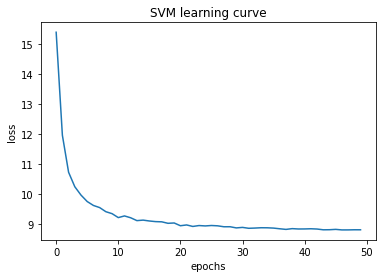

In [50]:
svm = SVM()
train_loss = svm.train(train_feature, train_label, 0.001, 10, 50)
y_pred = svm.predict(train_feature)
acc = svm.accuracy(y_pred, train_label)
print(acc)
plt.plot(train_loss)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("SVM learning curve")


In [51]:
# test on the test set
y_pred = svm.predict(test_feature)
acc = svm.accuracy(y_pred, test_label)
print("the accuracy on the test set is %f." % acc)


the accuracy on the test set is 0.636444.


In [52]:
df = pd.read_csv("project_data/data/eval.ids.txt", header=None)
df.columns = ["example_id"]
print(df.head())

label = svm.predict(eval_feature)
df["label"] = label
df.label[df["label"] == -1] = 0
df.label = df.label.astype(int)
df.to_csv("eval4_svm2.csv", index=False)

   example_id
0           0
1           1
2           2
3           3
4           4


<ipython-input-52-538ab2b2896e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.label[df["label"] == -1] = 0


In [53]:
class LR(object):

    def __init__(self):
        self.W = None # the container to store the weight vector

    # the train method
    def train(self, X, y, learning_rate, tradeoff, num_iters):
        # we still use the same
        num = X.shape[1]
        self.W = np.random.uniform(-0.01, 0.01, size=(num,))
        #self.W = np.zeros((num,))
        # history of list to store the loss at each iteration
        loss_his = []
        for it in range(num_iters):
            loss = 0
            # print("During the %d epoch!!" % (it+1))
            # shuffle the feature and label accordingly
            # use the shape[0] to shuffle these two arrays
            s = np.arange(X.shape[0]) # how many samples we have
            np.random.shuffle(s)
            shuffled_X = X[s]
            shuffled_y = y[s]
            # iterate through each sample
            for i, x in enumerate(shuffled_X):
                #print(x.shape)
                y_i = shuffled_y[i]
                loss += np.log(1 + np.exp(-y_i*self.W @ x)+ (1/tradeoff)*self.W @ self.W)
                self.W = (1-(2*learning_rate/((1+it)*tradeoff)))*self.W + (learning_rate/(1+it))*(1 - self._sigma(x, y_i))*y_i*x
            # after this epoch we record the average loss
            avg_loss = loss/X.shape[0]
            loss_his.append(avg_loss)

            if it % 5 == 0:
                print('iteration %d / %d: loss: %f' % (it, num_iters, avg_loss))

        return loss_his

    # implement the sigma
    def _sigma(self, x, y):
        value = y*self.W @ x
        if  value < 0:
            return np.exp(value) / (1 + np.exp(value))
        else:
            return 1 / (1 + np.exp(-value))

    # the predict method (no need to change this part!)
    def predict(self, X):
        scores = X @ self.W
        mask = scores >= 0
        scores[mask] = 1
        scores[~mask] = -1
        return scores

    # get the accuracy
    def accuracy(self, y_pred, y):
        acc = np.sum(y_pred == y) / y.shape[0]
        return acc

In [54]:
learning_rates = [1, 0.1, 0.01, 10e-3, 10e-4, 10e-5]
Cs = [10e-1, 1, 10, 100, 10e3, 10e4]
num_of_folds = len(train_feature_folds)
accs = np.zeros([len(learning_rates)*len(Cs), num_of_folds])

for j,lr in enumerate(learning_rates):
    for k, tf in enumerate(Cs):
        for i in range(num_of_folds):
            lgr = LR()
            print("We are doing the cross_validation on lr: %f, tradeoff: %f and the %d group as validation set!" % (lr, tf, i+1))
            train_concat_features = np.concatenate([train_feature_folds[l] for l in range(num_of_folds) if l != i])
            train_concat_labels = np.concatenate([train_label_folds[l] for l in range(num_of_folds) if l != i])
            lgr.train(train_concat_features, train_concat_labels, lr, tf, 20)
            y_pred = lgr.predict(train_feature_folds[i])
            acc = lgr.accuracy(y_pred, train_label_folds[i])
            accs[j*6 + k][i] = acc

print("Finished!")

print(accs)
avg_accs = np.mean(accs, axis=1)
stds = np.std(accs, axis=1)
print("The best accurary is %f with learning rate %f and C trade off at %f" % (np.max(avg_accs), learning_rates[np.argmax(avg_accs) // 6], Cs[np.argmax(avg_accs) % 6]))
for i in range(len(learning_rates)):
    for j in range(len(Cs)):
        print("The average cross-validated accuracy with learning rate %f and C %f is %f" % (learning_rates[i], Cs[j], avg_accs[i*6+j]))
        print("The average cross-validated std with learning rate %f and C %f is %f" % (learning_rates[i], Cs[j], stds[i*6+j]))

We are doing the cross_validation on lr: 1.000000, tradeoff: 1.000000 and the 1 group as validation set!
iteration 0 / 20: loss: inf
iteration 5 / 20: loss: 10.052182
iteration 10 / 20: loss: 5.832410
iteration 15 / 20: loss: 4.121791
We are doing the cross_validation on lr: 1.000000, tradeoff: 1.000000 and the 2 group as validation set!
iteration 0 / 20: loss: inf
iteration 5 / 20: loss: 10.165684
iteration 10 / 20: loss: 5.879192
iteration 15 / 20: loss: 4.150342
We are doing the cross_validation on lr: 1.000000, tradeoff: 1.000000 and the 3 group as validation set!
iteration 0 / 20: loss: inf
iteration 5 / 20: loss: 9.827005
iteration 10 / 20: loss: 5.954379
iteration 15 / 20: loss: 4.097729
We are doing the cross_validation on lr: 1.000000, tradeoff: 1.000000 and the 4 group as validation set!
iteration 0 / 20: loss: inf
iteration 5 / 20: loss: 10.040173
iteration 10 / 20: loss: 5.838568
iteration 15 / 20: loss: 4.221661
We are doing the cross_validation on lr: 1.000000, tradeoff: 

<ipython-input-53-f02c88eaa3a9>:27: RuntimeWarning: overflow encountered in exp
  loss += np.log(1 + np.exp(-y_i*self.W @ x)+ (1/tradeoff)*self.W @ self.W)


iteration 0 / 20: loss: 0.962038
iteration 5 / 20: loss: 0.645996
iteration 10 / 20: loss: 0.625145
iteration 15 / 20: loss: 0.620757
0.6464571428571428


Text(0.5, 1.0, 'LR learning curve')

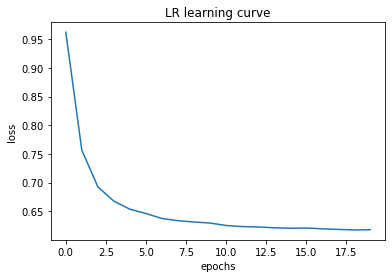

In [55]:
lgr = LR()
train_loss = lgr.train(train_feature, train_label, 0.01, 10e3, 20)
y_pred = lgr.predict(train_feature)
acc = lgr.accuracy(y_pred, train_label)
print(acc)
plt.plot(train_loss)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("LR learning curve")
# plt.savefig("lr_loss.png", dpi=600)

In [56]:
# test on the test set
y_pred = lgr.predict(test_feature)
acc = lgr.accuracy(y_pred, test_label)
print("the accuracy on the test set is %f." % acc)

the accuracy on the test set is 0.632444.


In [57]:
df = pd.read_csv("project_data/data/eval.ids.txt", header=None)
df.columns = ["example_id"]
print(df.head())

label = lgr.predict(eval_feature)
df["label"] = label
df.label[df["label"] == -1] = 0
df.label = df.label.astype(int)
df.to_csv("eval5_lgr.csv", index=False)

   example_id
0           0
1           1
2           2
3           3
4           4


<ipython-input-57-a2118311f592>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.label[df["label"] == -1] = 0


In [4]:
# For the last one, I wanna first try the Adaboost for the final one
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=200, algorithm='SAMME.R', learning_rate=0.5)
ada_clf.fit(train_feature, train_label)

AdaBoostClassifier(learning_rate=0.5, n_estimators=200)

In [5]:
print(ada_clf.score(train_feature, train_label))

0.6865714285714286


In [6]:
print(ada_clf.score(test_feature, test_label))

0.6488888888888888


In [9]:
y_pred = ada_clf.predict(eval_feature)
print(y_pred)

[ 1 -1  1 ... -1 -1 -1]


In [10]:
df = pd.read_csv("project_data/data/eval.ids.txt", header=None)
df.columns = ["example_id"]
print(df.head())

label = y_pred
df["label"] = label
df.label[df["label"] == -1] = 0
df.label = df.label.astype(int)
df.to_csv("eval6_ada.csv", index=False)

   example_id
0           0
1           1
2           2
3           3
4           4
